In [1]:
from astropy.table import Table
from astropy.timeseries import TimeSeries
from astropy import units as u

from matplotlib import pyplot
import numpy
import seaborn

from pathlib import Path

from targets import TARGETS

1SWASPJ002552.75+454445.3


/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)
/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)
/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)
/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)


<Figure size 432x288 with 0 Axes>

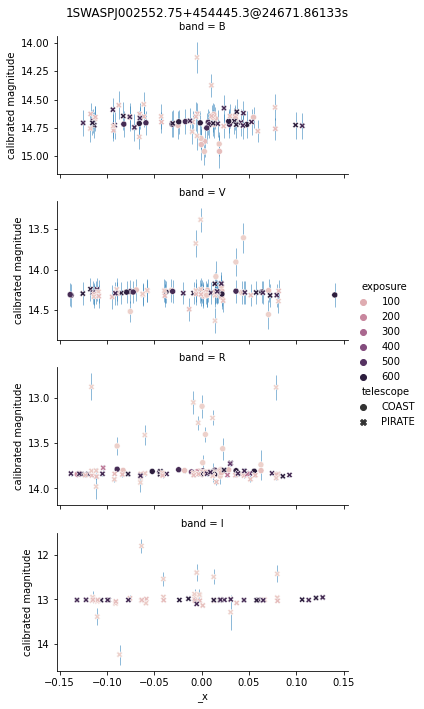

1SWASPJ002552.88+454558.7


/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)
/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)
/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)
/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)


<Figure size 432x288 with 0 Axes>

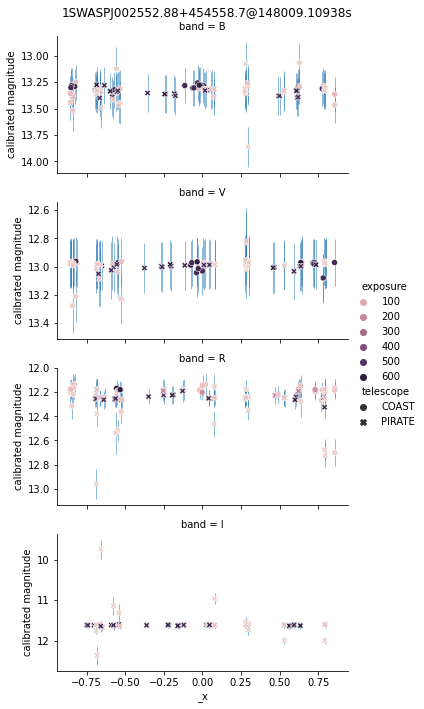

1SWASPJ184559.85+471858.4


<Figure size 432x288 with 0 Axes>

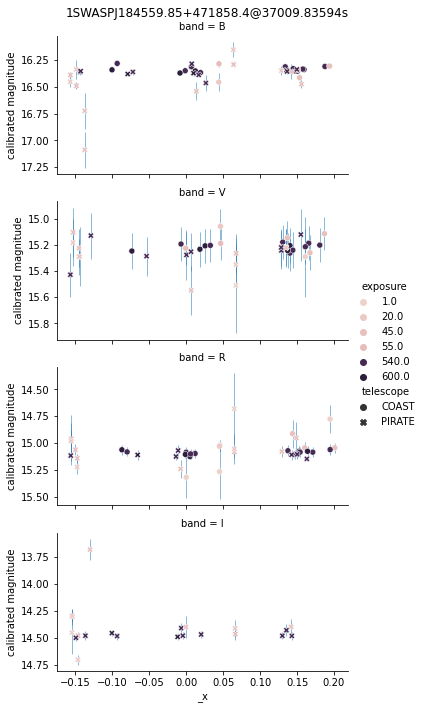

1SWASPJ002551.12+454523.8


/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)
/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)
/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)
/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)


<Figure size 432x288 with 0 Axes>

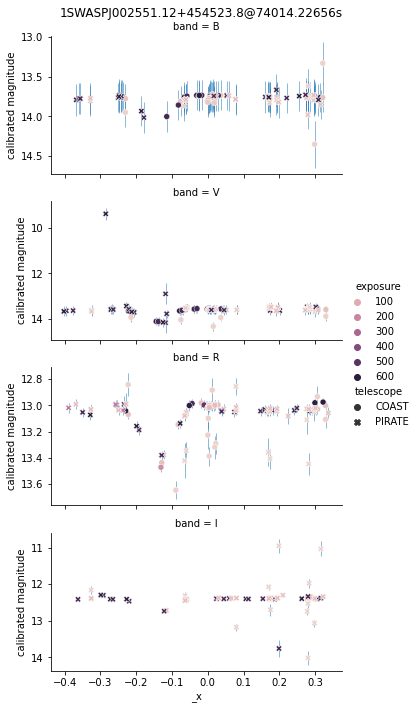

In [2]:
for table in Path('data').glob('target_observations/*.ecsv'):
    if table.stem not in TARGETS:
        continue
    target_config = TARGETS[table.stem]
    if 'expected_periods' not in target_config:
        continue
    print(table.stem)
    timeseries = TimeSeries.read(table, time_column='timestamp', time_format='jd')
    timeseries = timeseries[timeseries['FLAGS'] == 0]
    for period in target_config['expected_periods']:
        fig = pyplot.figure()
        fig.suptitle(f'{table.stem}@{period}s')
        folded = timeseries.fold(period=period * u.second)

        mag = seaborn.relplot(
            x=folded.time.jd,
            y=folded['calibrated magnitude'],
            style=folded['telescope'],
            hue=folded['exposure'],
            row=folded['band'],
            row_order=('B', 'V', 'R', 'I'),
            facet_kws={'sharey': False},
            height=2.5,
            aspect=2,
        )
        for band, ax in mag.axes_dict.items():
            band_data = folded[folded['band'] == band]
            band_data['calibrated magnitude'].fill_value = numpy.nan
            ax.errorbar(
                band_data.time.jd,
                band_data['calibrated magnitude'],
                yerr=band_data['calibrated magnitude err'],
                ls='none',
                zorder=-1,
                alpha=0.5,
                elinewidth=1,
            )
            ax.invert_yaxis()
        mag.fig.suptitle(f'{table.stem}@{period}s')
        pyplot.subplots_adjust(top=0.94)
        pyplot.show()